In [2]:
# Import the  Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
data=pd.read_csv('sample_data/state_wise_data.csv')
# Data is taken from https://data.gov.in/
# Unemployment Rate from this seems to be having errors, hence data taken from 
#https://www.statista.com/statistics/642853/urban-unemployement-rate-by-state-india/

In [4]:
data.head()

,State,Gross_enroll_higher_sec_girls,Gross_enroll_higher_sec_total,Percent_schools_with_computer,Urban_unemployment_Rate,Electricity,Drinking_water,Sanitation,Clean_Cooking_fuel,Iodized_Salt,Women_Literacy,Men_Literacy,Immunization,Knowledge_HIV_Women,Knowledge_HIV_Men,Tobacco_alcohol_women,Tobacco_alcohol_men
0,Andaman and Nicobar Islands,76.40,74.62,57.00,17.4,97.0,94.3,74.3,63.5,99.3,84.1,88.5,73.2,29.3,44.0,2.5,51.7
1,Andhra Pradesh,62.27,60.16,30.59,6.6,98.8,72.7,53.6,62.0,81.6,62.9,79.4,65.3,29.0,55.5,0.4,34.9
2,Arunachal Pradesh,61.60,61.81,24.36,9.9,88.7,87.5,61.3,45.0,99.3,65.6,84.5,38.2,16.0,27.4,26.3,59.0
3,Assam,39.47,38.81,10.76,6.3,78.2,83.8,47.7,25.1,99.6,71.8,82.8,47.1,9.4,22.4,6.9,35.6
4,Bihar,36.66,35.62,9.37,9.0,58.6,98.2,25.2,17.8,93.6,49.6,77.8,61.7,10.1,26.2,0.2,28.9


In [5]:
# View the data
# I have removed Telengana and Dadra and Nagar Haveli as it was incomplete
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          34 non-null     object 
 1   Gross_enroll_higher_sec_girls  34 non-null     float64
 2   Gross_enroll_higher_sec_total  34 non-null     float64
 3   Percent_schools_with_computer  34 non-null     float64
 4   Urban_unemployment_Rate        34 non-null     float64
 5   Electricity                    34 non-null     float64
 6   Drinking_water                 34 non-null     float64
 7   Sanitation                     34 non-null     float64
 8   Clean_Cooking_fuel             34 non-null     float64
 9   Iodized_Salt                   34 non-null     float64
 10  Women_Literacy                 34 non-null     float64
 11  Men_Literacy                   34 non-null     float64
 12  Immunization                   34 non-null     float

In [6]:
# Describe the data
data.describe()

,Gross_enroll_higher_sec_girls,Gross_enroll_higher_sec_total,Percent_schools_with_computer,Urban_unemployment_Rate,Electricity,Drinking_water,Sanitation,Clean_Cooking_fuel,Iodized_Salt,Women_Literacy,Men_Literacy,Immunization,Knowledge_HIV_Women,Knowledge_HIV_Men,Tobacco_alcohol_women,Tobacco_alcohol_men
count,34.000000,34.000000,34.00000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,61.983235,60.112059,41.75500,9.632353,93.311765,88.355882,60.714706,49.426471,95.691176,76.305882,88.194118,66.202941,25.667647,35.314706,3.135294,35.676471
std,19.504519,18.216234,28.69138,4.519971,9.223119,10.881934,19.927157,22.425260,4.506048,11.741172,5.691192,14.582981,12.295743,15.130886,5.817053,13.446912
min,32.270000,21.540000,9.37000,2.600000,58.600000,41.600000,24.400000,17.800000,81.600000,49.600000,77.800000,35.700000,9.400000,10.900000,0.000000,6.800000
25%,44.187500,43.907500,15.29000,7.200000,91.650000,86.100000,50.150000,31.825000,93.625000,67.800000,84.350000,55.175000,17.650000,25.975000,0.300000,28.750000
50%,59.370000,59.875000,33.17500,8.700000,97.000000,91.000000,60.850000,51.600000,96.500000,79.850000,88.100000,65.600000,25.250000,34.300000,0.900000,36.400000
75%,78.005000,74.755000,59.14250,10.225000,99.350000,94.525000,74.975000,63.125000,99.100000,83.875000,91.300000,78.050000,30.675000,44.300000,3.900000,44.675000
max,102.350000,98.160000,100.00000,25.300000,100.000000,99.500000,99.400000,97.700000,99.600000,97.900000,99.800000,91.300000,66.400000,68.200000,26.300000,59.000000


## Data Correction

In [7]:
# View Gross_enroll_higher_sec_girls>100
data[data.Gross_enroll_higher_sec_girls>100]

,State,Gross_enroll_higher_sec_girls,Gross_enroll_higher_sec_total,Percent_schools_with_computer,Urban_unemployment_Rate,Electricity,Drinking_water,Sanitation,Clean_Cooking_fuel,Iodized_Salt,Women_Literacy,Men_Literacy,Immunization,Knowledge_HIV_Women,Knowledge_HIV_Men,Tobacco_alcohol_women,Tobacco_alcohol_men
17,Lakshadweep,102.35,98.16,100.0,25.3,99.9,91.5,99.4,34.8,96.1,95.7,99.8,86.9,25.1,37.6,0.0,6.8


In [8]:
# We will change the values which is greater than 100 to 100 for the time being.
data.Gross_enroll_higher_sec_girls=np.where(data.Gross_enroll_higher_sec_girls>100,100,\
                                            data.Gross_enroll_higher_sec_girls)

In [9]:
#Create a copy of the data by removing the State Column
data_copy=data.iloc[:,1:]
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_copy)

In [10]:
# Import Hierarchical Clustering Packages
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

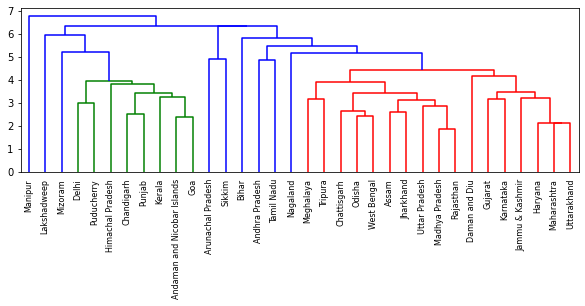

In [11]:
# for method parameter we can try :  single,complete,average,weighted,centroid,median
# For metric parameter  we can try :'braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, 
#‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’,
#‘matching’, ‘minkowski’, rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, 
#‘sqeuclidean’, ‘yule’.
plt.figure(figsize=(10,3))
mergings=linkage(data_scaled,method='average',metric='minkowski')
dendrogram(mergings, labels=tuple(data['State']),leaf_rotation=90)
plt.show()

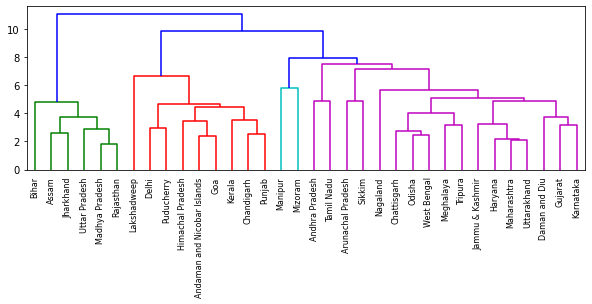

In [12]:
# Try with method='complete',metric='euclidean'
plt.figure(figsize=(10,3))
mergings=linkage(data_scaled,method='complete',metric='euclidean')
dendrogram(mergings, labels=tuple(data['State']),leaf_rotation=90)
plt.show()

<font
color= green><b>Of the various method & metric tried, method='complete',metric='euclidean' seems to be giving a better picture of the state grouping based on my understanding of state demography and dynamics </b></font>

In [13]:
# Cut the tree at 6 clusters
h_lables=cut_tree(mergings,n_clusters=6).reshape(-1,)
data['Cluster']=h_lables
data.Cluster=data.Cluster+1
data['Cluster'].value_counts()

5    13
1     9
4     6
6     2
3     2
2     2
Name: Cluster, dtype: int64

<font
color= green><b>Tried different cluster cuts and found 5 to be a logical optimum based on the distribution of the clusters</b></font>

In [14]:
cols=['Gross_enroll_higher_sec_girls',
       'Gross_enroll_higher_sec_total', 'Percent_schools_with_computer',
       'Urban_unemployment_Rate', 'Electricity', 'Drinking_water', 'Sanitation',
       'Clean_Cooking_fuel', 'Iodized_Salt', 'Women_Literacy', 'Men_Literacy',
       'Immunization', 'Knowledge_HIV_Women', 'Knowledge_HIV_Men',
       'Tobacco_alcohol_women', 'Tobacco_alcohol_men']

In [15]:
dic={'Gross_enroll_higher_sec_girls':'Girls enrollment Higher Sec',
       'Gross_enroll_higher_sec_total':'Total Enrollment Higher Sec', 
     'Percent_schools_with_computer':'Computer Facility in schools',
       'Urban_unemployment_Rate':'Unemployment Rate', 'Electricity':'Electricity at Home', \
     'Drinking_water':'Clean Drinking water at Home', 'Sanitation':'Basic Sanitation facilities at Home',
       'Clean_Cooking_fuel':'Clean Cooking Fuel', 'Iodized_Salt':'Usage of iodized Salt',\
       'Women_Literacy':'Women Literacy', 'Men_Literacy':'Men Literacy',
       'Immunization':'Immunisation', 'Knowledge_HIV_Women':'Knowledge Abount HIV :Women', \
      'Knowledge_HIV_Men':'Knowledge Abount HIV :Men',
       'Tobacco_alcohol_women':'Tobacco Alcochol Usgae :Women', 'Tobacco_alcohol_men':'Tobacco Alcochol Usgae :Men'}

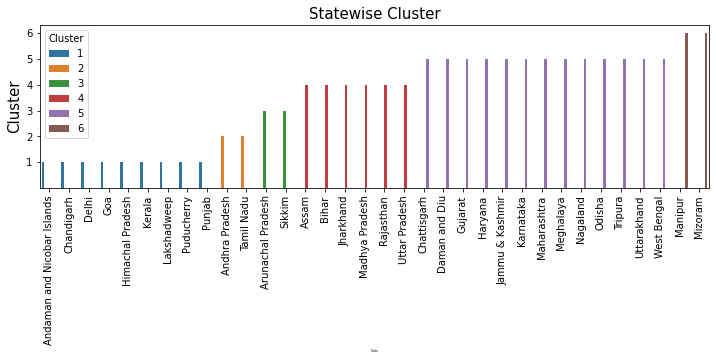

In [16]:
# Plot to see which States are grouped together
plt.figure(figsize=(12,3))
dataplot=sns.barplot(x='State',y='Cluster', data=data.sort_values(['Cluster','State']),hue='Cluster') 
plt.ylabel("Cluster", fontsize= 15)
plt.yticks(range(1,7))
plt.xlabel("State", fontsize= 3)
plt.title("Statewise Cluster", fontsize= 15)
plt.xticks(rotation='vertical')
plt.show()

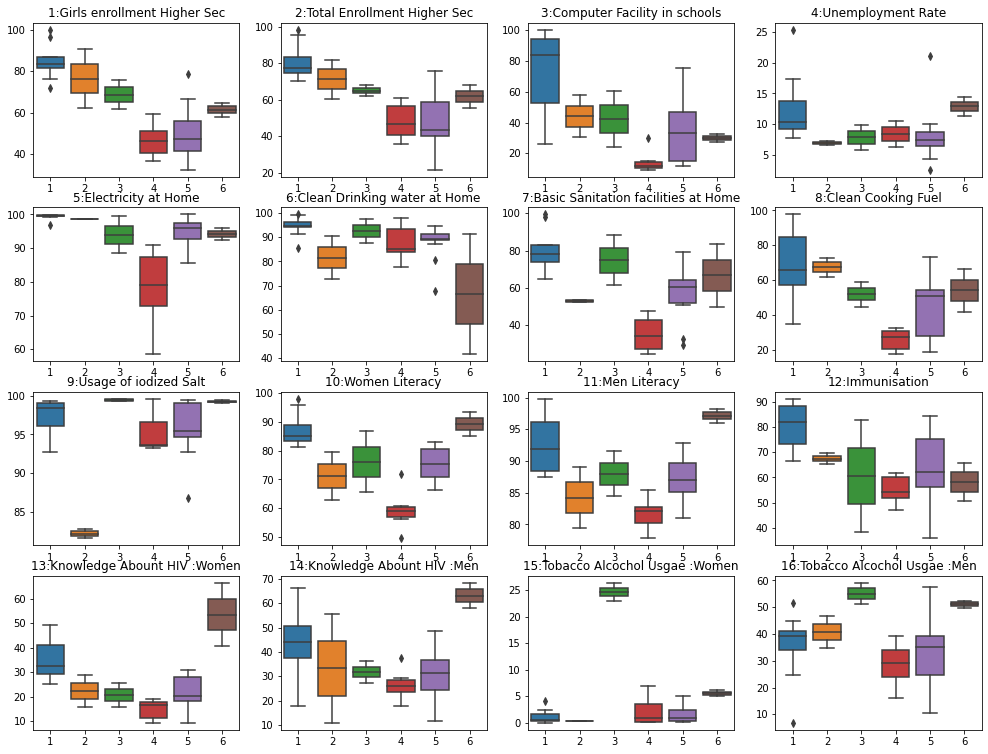

In [17]:
plt.figure(figsize=(17, 13))
k=1
l=0
for i in cols:
    l=l+1
    plt.subplot(4,4,k)
    plt.title(str(l)+':'+dic[i])
    g=sns.boxplot(x = 'Cluster', y = i, data = data)
    g.set(xlabel=None)
    g.set(ylabel=None)
    k=k+1
plt.show()

In [21]:
import geopandas as gpd

In [22]:
#pip install geopandas

In [61]:

fp = "sample_data/Igismap_2/india_administrative_state_boundary.shp"
#fp = "sample_data/Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)

In [62]:
data['State']=np.where (data.State=='Andaman and Nicobar Islands','Andaman & Nicobar Island',data.State)
data['State']=np.where (data.State=='Delhi','NCT of Delhi',data.State)
data['State']=np.where (data.State=='Arunachal Pradesh','Arunanchal Pradesh',data.State)
data['State']=np.where (data.State=='Daman and Diu','Daman & Diu',data.State)

In [63]:
merged = map_df.set_index('st_nm').join(data.set_index('State'))
#merged.head()

,gid,tid,territory_,geometry,Gross_enroll_higher_sec_girls,Gross_enroll_higher_sec_total,Percent_schools_with_computer,Urban_unemployment_Rate,Electricity,Drinking_water,Sanitation,Clean_Cooking_fuel,Iodized_Salt,Women_Literacy,Men_Literacy,Immunization,Knowledge_HIV_Women,Knowledge_HIV_Men,Tobacco_alcohol_women,Tobacco_alcohol_men,Cluster
st_nm,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Island,1,None,None,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",76.40,74.62,57.00,17.4,97.0,94.3,74.3,63.5,99.3,84.1,88.5,73.2,29.3,44.0,2.5,51.7,1.0
Arunanchal Pradesh,2,None,None,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",61.60,61.81,24.36,9.9,88.7,87.5,61.3,45.0,99.3,65.6,84.5,38.2,16.0,27.4,26.3,59.0,3.0
Assam,3,None,None,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",39.47,38.81,10.76,6.3,78.2,83.8,47.7,25.1,99.6,71.8,82.8,47.1,9.4,22.4,6.9,35.6,4.0
Bihar,4,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",36.66,35.62,9.37,9.0,58.6,98.2,25.2,17.8,93.6,49.6,77.8,61.7,10.1,26.2,0.2,28.9,4.0
Chandigarh,5,None,None,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",86.75,83.28,94.53,9.2,99.6,99.5,82.9,93.9,99.0,83.2,87.7,79.5,41.1,66.4,0.5,39.3,1.0


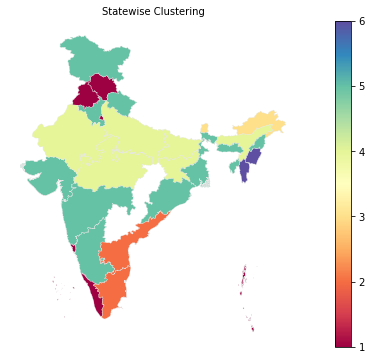

In [70]:
fig, ax = plt.subplots(1, figsize=(13, 6))
ax.axis('off')
ax.set_title('Statewise Clustering', fontdict={'fontsize': '10', 'fontweight' : '3'})
merged.plot(column='Cluster', cmap=plt.cm.get_cmap('Spectral'), linewidth=0.3, ax=ax, edgecolor='0.9', legend=True)
plt.show()